In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
variable=pd.read_csv("C:\\Users\\HP\\Desktop\\Suprateek\\Data Science\\Python Project 2\\diabetes.csv")
variable

PREGNANCIES  GLUCOSE  BLOOD PRESSURE  SKIN THICKNESS  INSULIN   BMI  \
0              6      148              72              35        0  33.6   
1              1       85              66              29        0  26.6   
2              8      183              64               0        0  23.3   
3              1       89              66              23       94  28.1   
4              0      137              40              35      168  43.1   
..           ...      ...             ...             ...      ...   ...   
763           10      101              76              48      180  32.9   
764            2      122              70              27        0  36.8   
765            5      121              72              23      112  26.2   
766            1      126              60               0        0  30.1   
767            1       93              70              31        0  30.4   

     DIABETES PEDIGREE FUNCTION  AGE  OUTCOME  
0                         0.627   50        1  
1                         0.351   31        0  
2                         0.672   32        1  
3                         0.167   21        0  
4                         2.288   33        1  
..                          ...  ...      ...  
763                       0.171   63        0  
764                       0.340   27        0  
765                       0.245   30        0  
766                       0.349   47        1  
767                       0.315   23        0  

[768 rows x 9 columns]

In [3]:
variable.describe()

PREGNANCIES     GLUCOSE  BLOOD PRESSURE  SKIN THICKNESS     INSULIN  \
count   768.000000  768.000000      768.000000      768.000000  768.000000   
mean      3.845052  120.894531       69.105469       20.536458   79.799479   
std       3.369578   31.972618       19.355807       15.952218  115.244002   
min       0.000000    0.000000        0.000000        0.000000    0.000000   
25%       1.000000   99.000000       62.000000        0.000000    0.000000   
50%       3.000000  117.000000       72.000000       23.000000   30.500000   
75%       6.000000  140.250000       80.000000       32.000000  127.250000   
max      17.000000  199.000000      122.000000       99.000000  846.000000   

              BMI  DIABETES PEDIGREE FUNCTION         AGE     OUTCOME  
count  768.000000                  768.000000  768.000000  768.000000  
mean    31.992578                    0.471876   33.240885    0.348958  
std      7.884160                    0.331329   11.760232    0.476951  
min      0.000000                    0.078000   21.000000    0.000000  
25%     27.300000                    0.243750   24.000000    0.000000  
50%     32.000000                    0.372500   29.000000    0.000000  
75%     36.600000                    0.626250   41.000000    1.000000  
max     67.100000                    2.420000   81.000000    1.000000

In [4]:
variable.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PREGNANCIES                 768 non-null    int64  
 1   GLUCOSE                     768 non-null    int64  
 2   BLOOD PRESSURE              768 non-null    int64  
 3   SKIN THICKNESS              768 non-null    int64  
 4   INSULIN                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   DIABETES PEDIGREE FUNCTION  768 non-null    float64
 7   AGE                         768 non-null    int64  
 8   OUTCOME                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
variable.isnull().values.any()

False

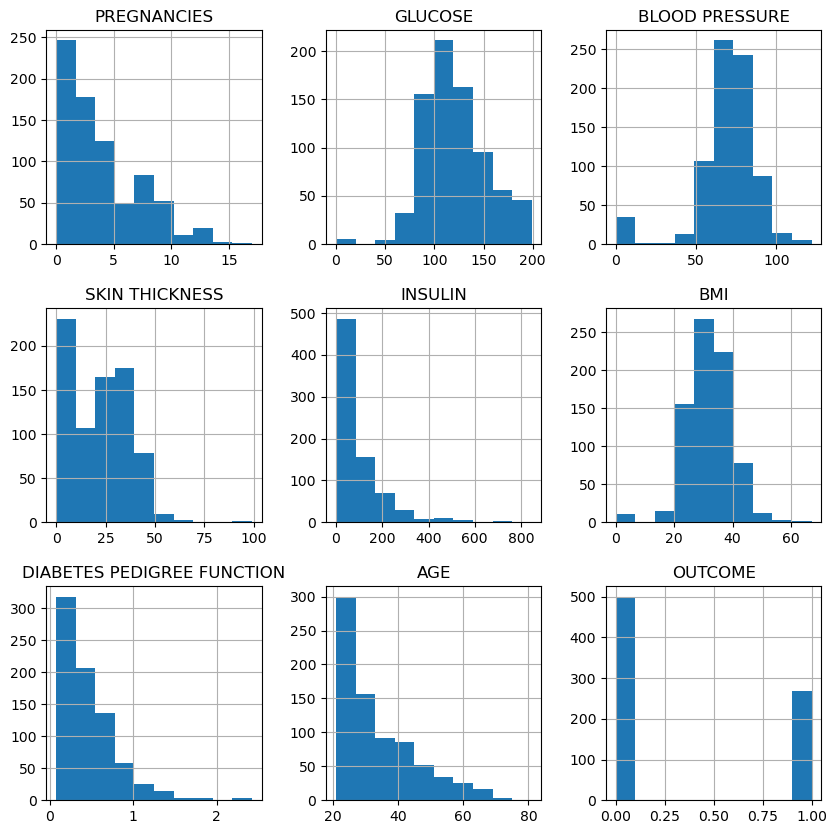

In [6]:
#histogram
variable.hist(bins=10, figsize=(10,10))
plt.show()

<Axes: >

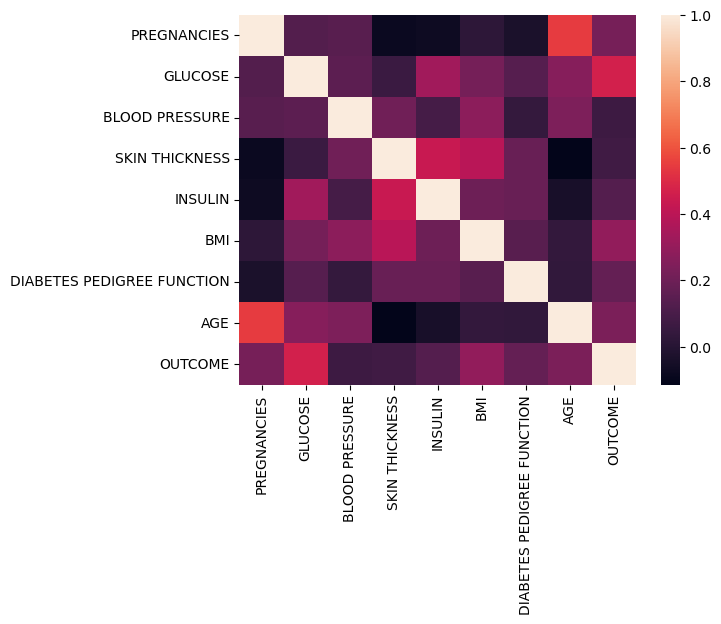

In [7]:
#Correlation
sns.heatmap(variable.corr())
# we see that skin thickness, age, insulin and pregnancies are fully independent on each other
#age and pregnanacies have negative correlation

<Axes: xlabel='count', ylabel='OUTCOME'>

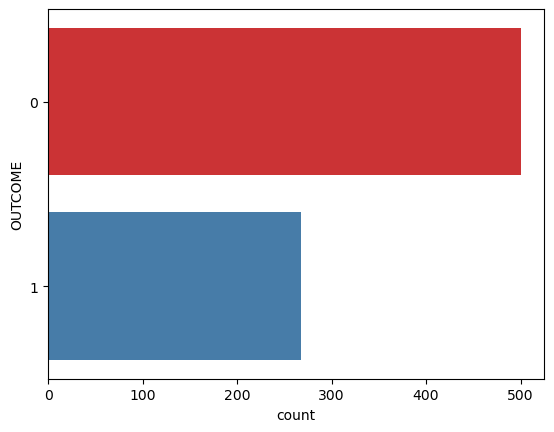

In [8]:
#lets count total outcome in each target 0 1
#0 means no diabeted
#1 means patient with diabtes
sns.countplot(y=variable['OUTCOME'],palette='Set1')

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

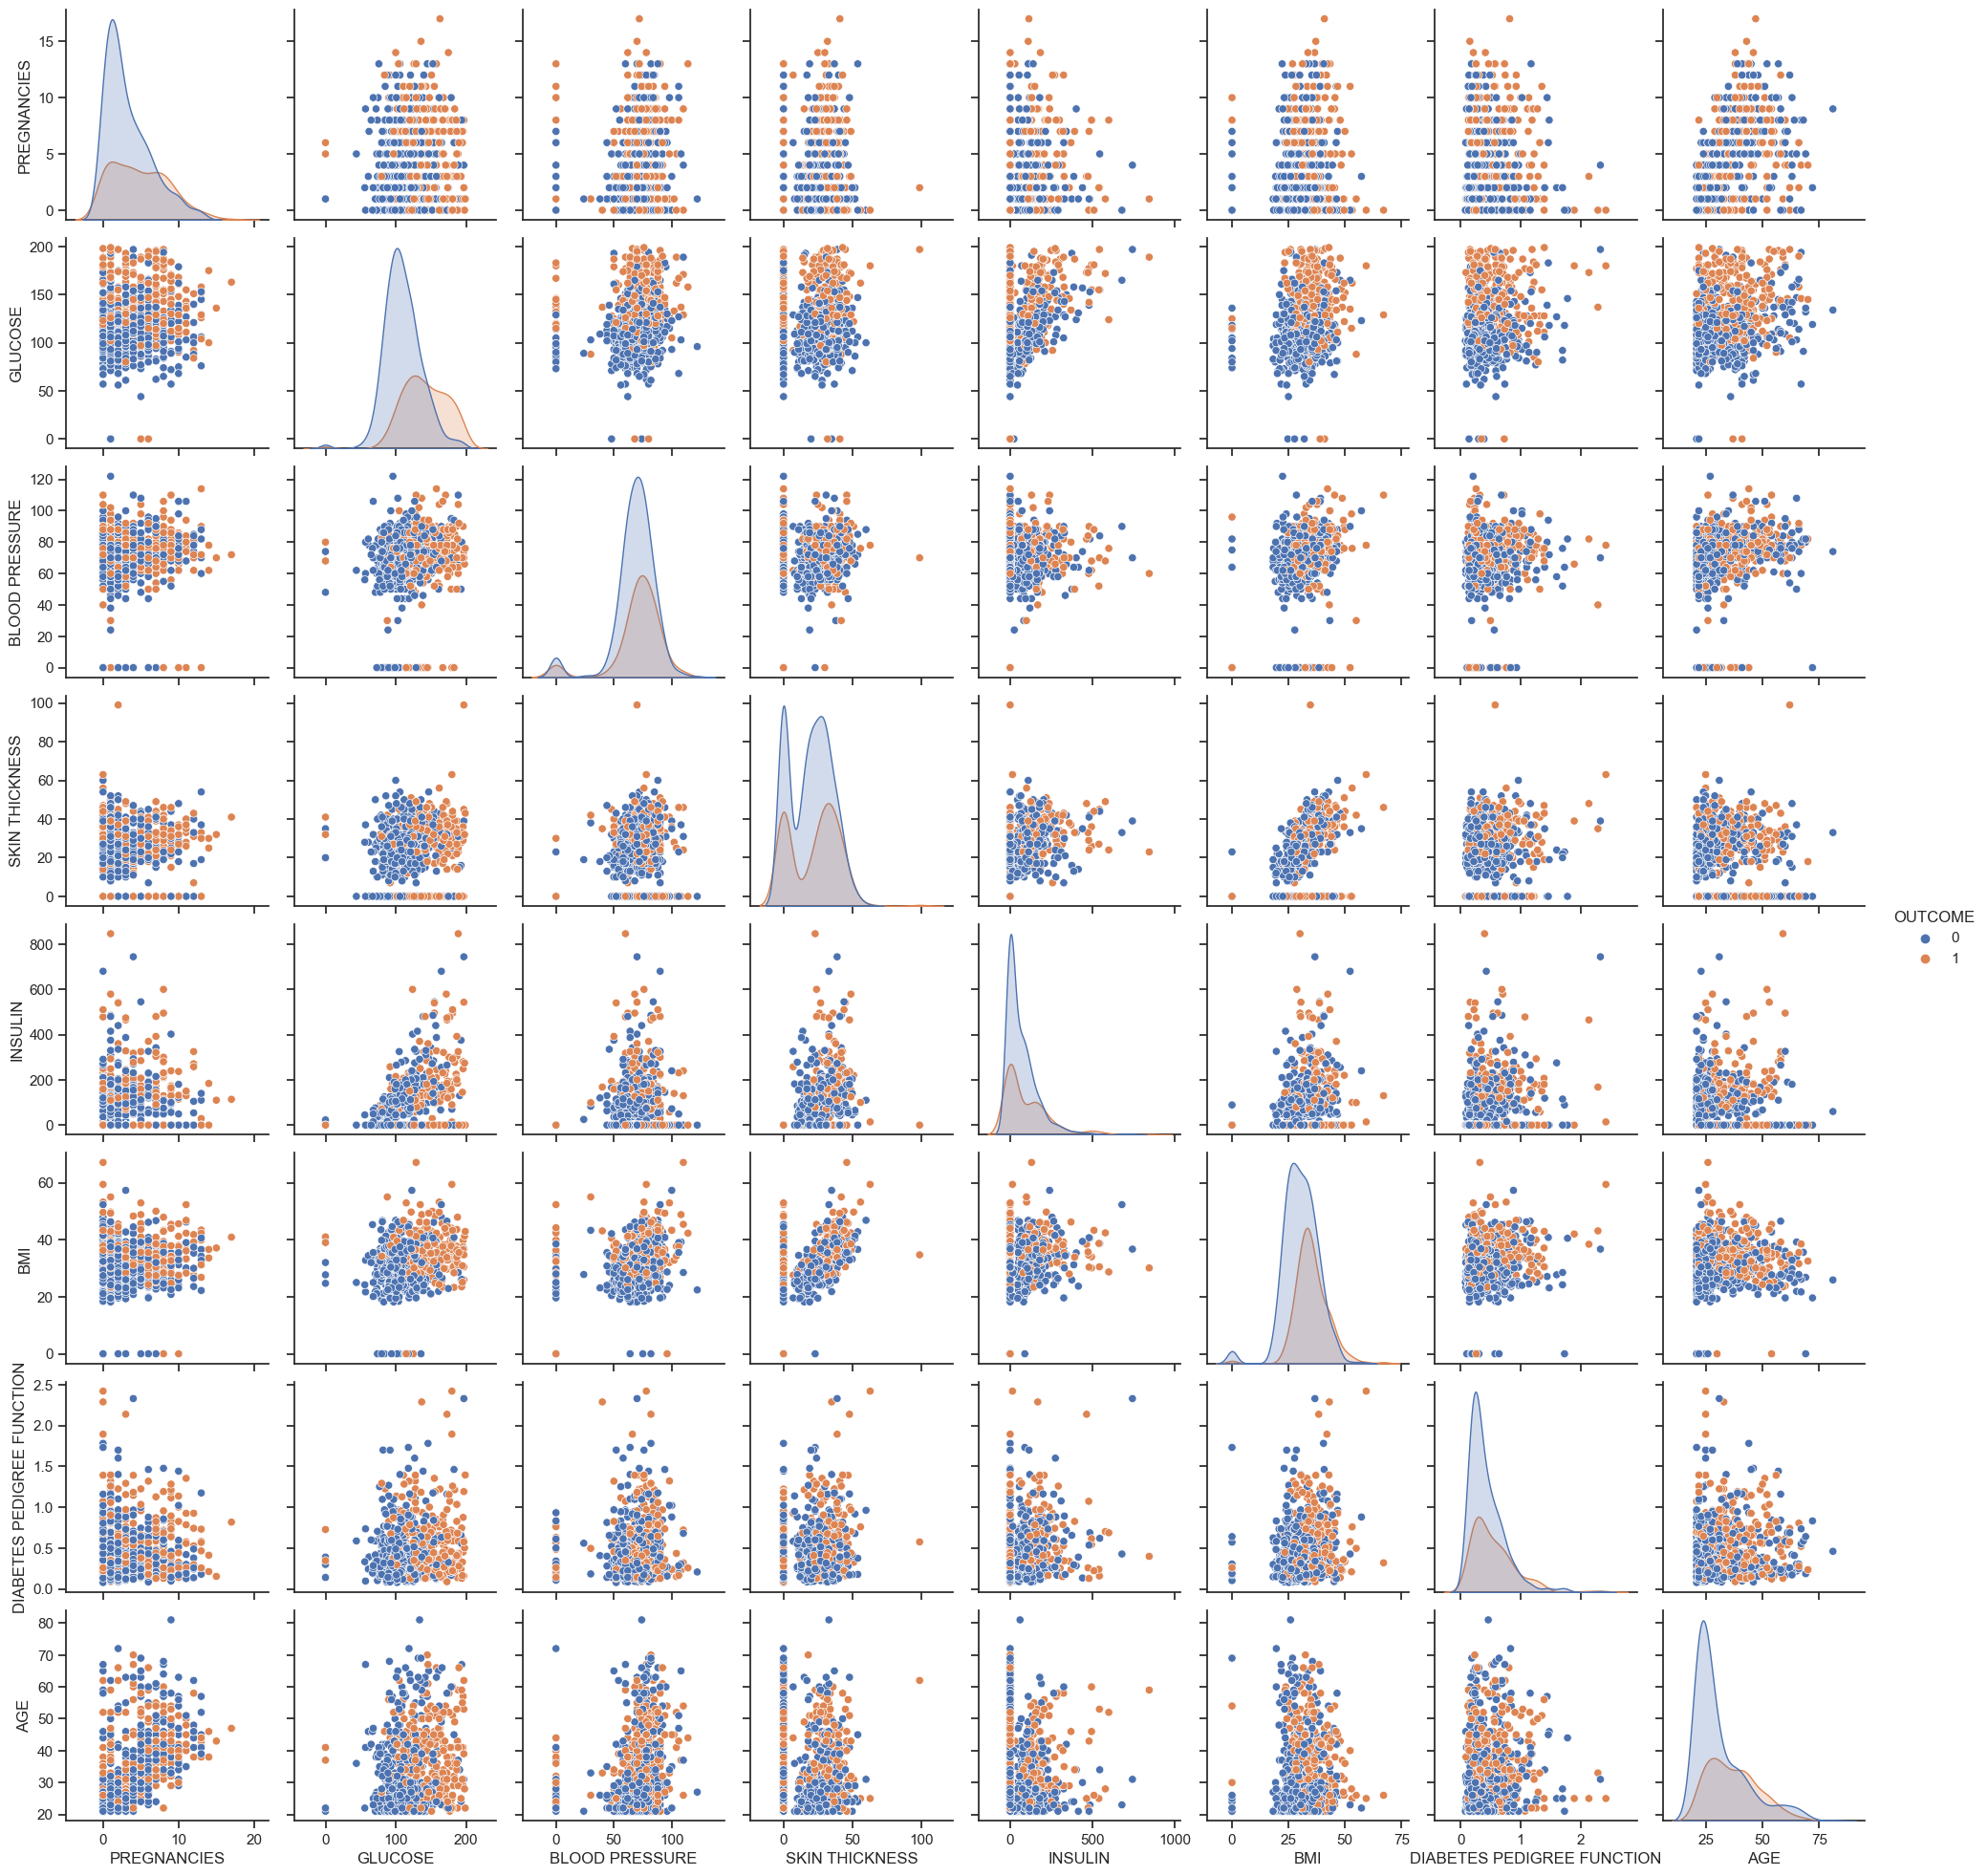

In [9]:
sns.set(style="ticks")
sns.pairplot(variable, hue="OUTCOME")

<Axes: >

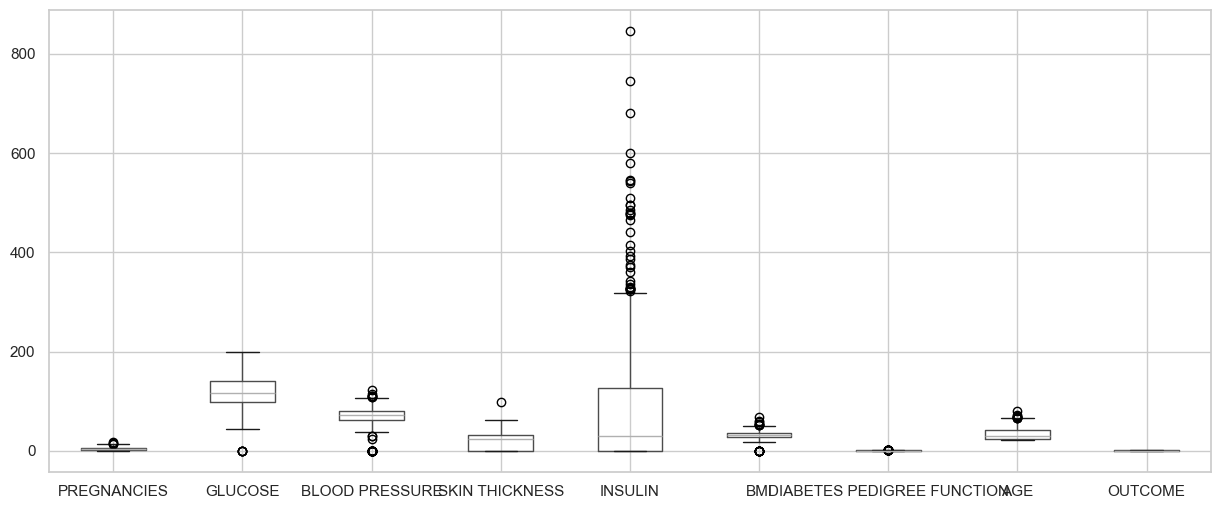

In [10]:

#box plot for outlier visualisation
sns.set(style="whitegrid")
variable.boxplot(figsize=(15,6))

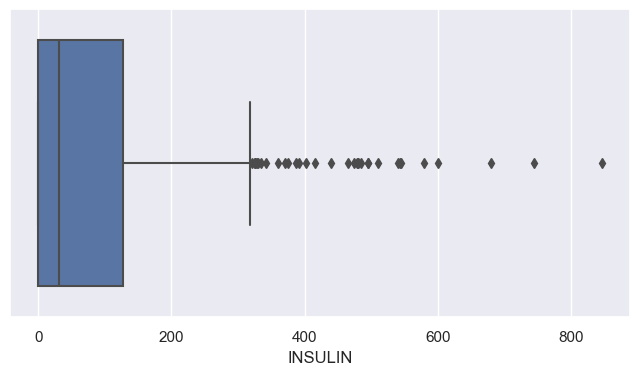

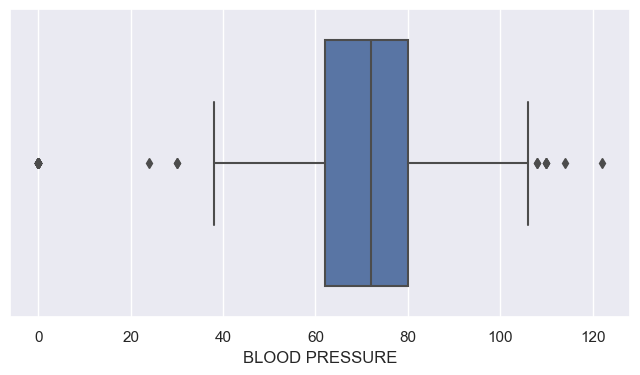

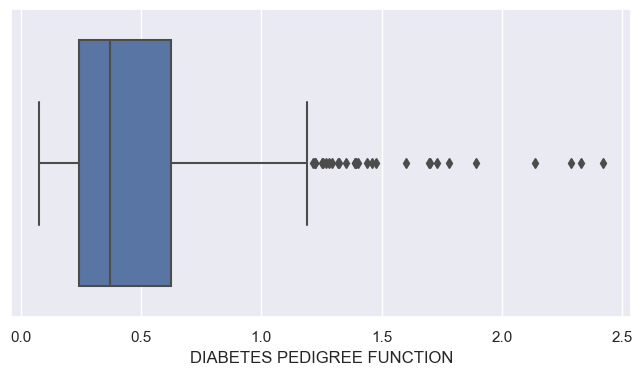

In [11]:
#box plot
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(8,4)})
sns.boxplot(x=variable['INSULIN'])
plt.show()
sns.boxplot(x=variable['BLOOD PRESSURE'])
plt.show()
sns.boxplot(x=variable['DIABETES PEDIGREE FUNCTION'])
plt.show()

In [12]:
#outlier remove
Q1=variable.quantile(0.25)
Q3=variable.quantile(0.75)
IQR=Q3-Q1
print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)
#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

---Q1--- 
 PREGNANCIES                    1.00000
GLUCOSE                       99.00000
BLOOD PRESSURE                62.00000
SKIN THICKNESS                 0.00000
INSULIN                        0.00000
BMI                           27.30000
DIABETES PEDIGREE FUNCTION     0.24375
AGE                           24.00000
OUTCOME                        0.00000
Name: 0.25, dtype: float64

---Q3--- 
 PREGNANCIES                     6.00000
GLUCOSE                       140.25000
BLOOD PRESSURE                 80.00000
SKIN THICKNESS                 32.00000
INSULIN                       127.25000
BMI                            36.60000
DIABETES PEDIGREE FUNCTION      0.62625
AGE                            41.00000
OUTCOME                         1.00000
Name: 0.75, dtype: float64

---IQR---
 PREGNANCIES                     5.0000
GLUCOSE                        41.2500
BLOOD PRESSURE                 18.0000
SKIN THICKNESS                 32.0000
INSULIN                       127.2500
BMI  

In [13]:
#outlier remove
variable_out = variable[~((variable < (Q1 - 1.5 * IQR)) |(variable > (Q3 + 1.5 * IQR))).any(axis=1)]
variable.shape,variable_out.shape
#more than 80 records deleted

((768, 9), (639, 9))

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

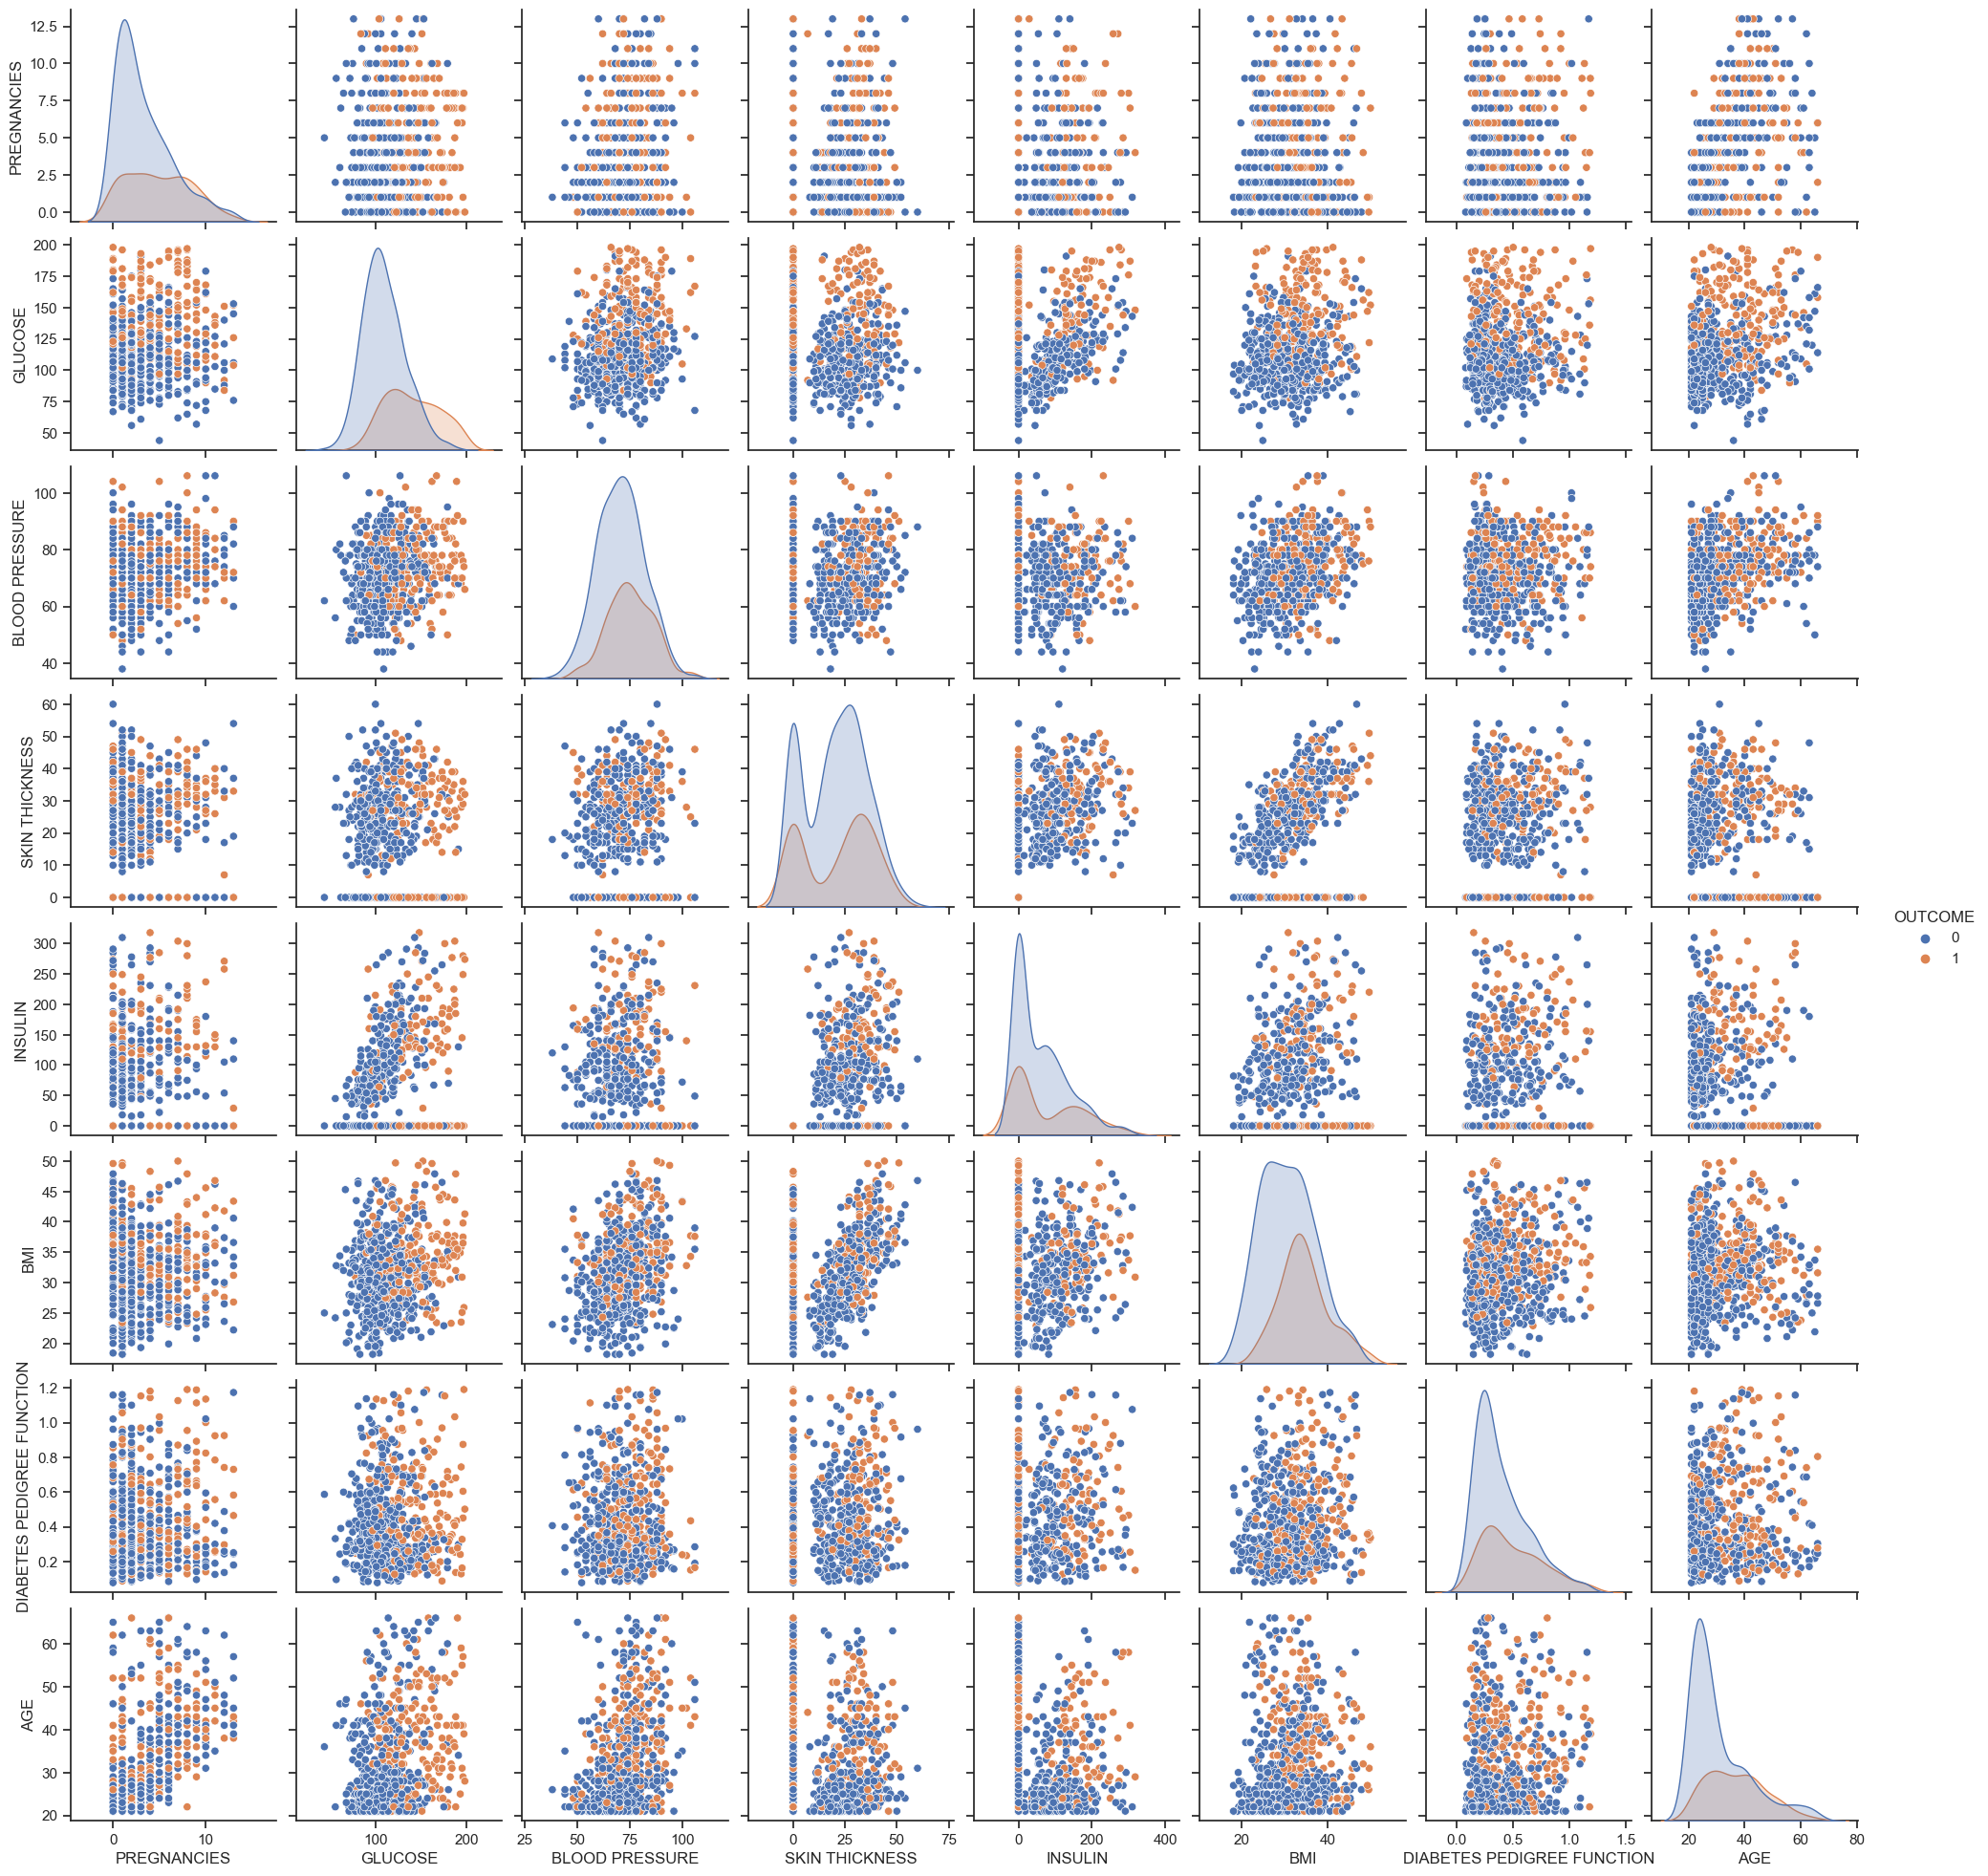

In [14]:
#Scatter matrix after removing outlier
sns.set(style="ticks")
sns.pairplot(variable_out, hue="OUTCOME")
plt.show()

In [15]:
#lets extract features and targets
X=variable_out.drop(columns=['OUTCOME'])
y=variable_out['OUTCOME']

In [16]:
#Splitting train test data 80 20 ratio
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [17]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((511, 8), (128, 8), (511,), (128,))

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.model_selection import cross_validate

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}
def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

In [19]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

acc=[]
roc=[]

clf=LogisticRegression()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Accuracy 0.7734375 ROC 0.7272130286314684


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

TP:  [ 7 10 10  9  6  7  6  7  5  6]
TN:  [33 31 35 30 35 35 33 30 34 32]
FN:  [ 9  5  5  6  9  8  9  8 11 10]
FP:  [3 5 1 6 1 1 3 6 1 3]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
#Support Vector Machine
from sklearn.svm import SVC

clf=SVC(kernel='linear')
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()


Accuracy 0.796875 ROC 0.7457315471499868
TP:  [ 7 11 11  8  5  7  8  7  4  7]
TN:  [32 31 33 31 35 34 33 29 34 33]
FN:  [ 9  4  4  7 10  8  7  8 12  9]
FP:  [4 5 3 5 1 2 3 7 1 2]


In [21]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)


Accuracy 0.734375 ROC 0.6829524560021014
TP:  [5 8 9 7 6 7 7 9 8 7]
TN:  [33 27 30 31 30 29 29 29 31 28]
FN:  [11  7  6  8  9  8  8  6  8  9]
FP:  [3 9 6 5 6 7 7 7 4 7]


In [22]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(train_X,train_y)

y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)
#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()



Accuracy 0.796875 ROC 0.754662463882322
TP:  [ 6 12 11  7  6  8  7  7  4  7]
TN:  [33 32 31 32 33 34 32 28 31 32]
FN:  [10  3  4  8  9  7  8  8 12  9]
FP:  [3 4 5 4 3 2 4 8 4 3]


In [23]:
#Naive Bayes Theorem
#import library
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()



Accuracy 0.7890625 ROC 0.7574205411084844
TP:  [ 8 12 12  8  7  9  9  9  5  8]
TN:  [29 32 31 29 33 32 29 25 32 28]
FN:  [ 8  3  3  7  8  6  6  6 11  8]
FP:  [ 7  4  5  7  3  4  7 11  3  7]


In [24]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf.fit(train_X,train_y)
y_pred=clf.predict(test_X)
#find accuracy
ac=accuracy_score(test_y,y_pred)
acc.append(ac)

#find the ROC_AOC curve
rc=roc_auc_score(test_y,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))

#cross val score
result=cross_validate(clf,train_X,train_y,scoring=scoring,cv=10)
display_result(result)

#display predicted values uncomment below line
#pd.DataFrame(data={'Actual':test_y,'Predicted':y_pred}).head()



Accuracy 0.734375 ROC 0.6829524560021014
TP:  [ 7 10  9  9 10  9  6  7  5  8]
TN:  [30 32 32 33 32 31 33 29 32 29]
FN:  [ 9  5  6  6  5  6  9  8 11  8]
FP:  [6 4 4 3 4 5 3 7 3 6]


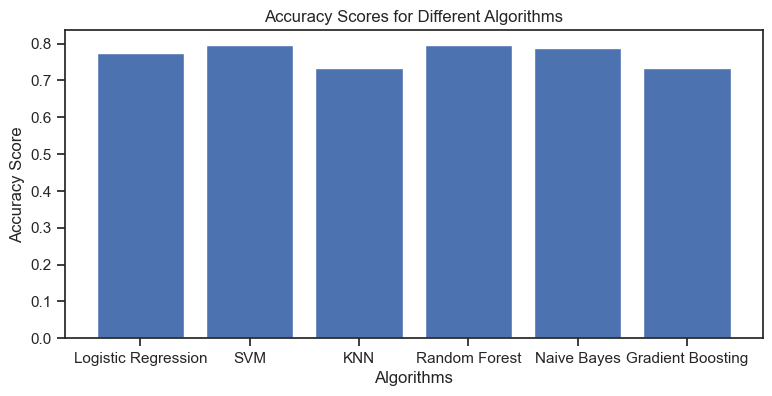

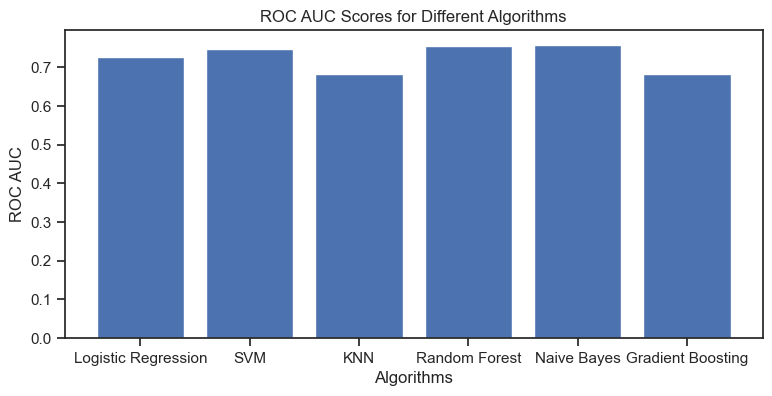

In [25]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.figure(figsize=(9, 4))
plt.bar(['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'Naive Bayes', 'Gradient Boosting'], acc, label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algorithms')
plt.title('Accuracy Scores for Different Algorithms')
plt.show()

# Plotting ROC AUC
plt.figure(figsize=(9, 4))
plt.bar(['Logistic Regression', 'SVM', 'KNN', 'Random Forest', 'Naive Bayes', 'Gradient Boosting'], roc, label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algorithms')
plt.title('ROC AUC Scores for Different Algorithms')
plt.show()
